# Dimond Price PredictionProject

### Importing the important libraries used in this project
    
    I will also import some of the Machine Learning libraries later.

In [1]:
# Pandas for data exploring and data cleaning

import pandas as pd
import numpy as np

# Seaborn and matplotlib for data Visulation 

import seaborn as sns

import matplotlib.pyplot as plt

# to show the plots in a notebook we have to execute the below command

%matplotlib inline

## Reading the data

In [2]:
# reading the data-set into pandas DataFrame

df = pd.read_csv('diamonds.csv',index_col=0)

In [3]:
# Cheacking the head of data

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Checking additional information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
# Describing the data

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# print the unique values of each categorical column

print('Unique value of column cut are : {}'.format(df['cut'].unique()))

print('Unique value of column color are : {}'.format(df['color'].unique()))

print('Unique value of column clarity are : {}'.format(df['clarity'].unique()))

Unique value of column cut are : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique value of column color are : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique value of column clarity are : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<AxesSubplot:>

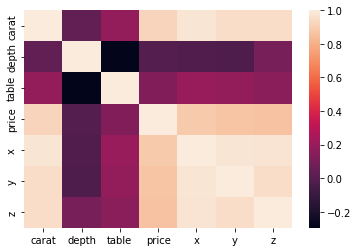

In [7]:
# Checking for the correlation between the columns using a heatmap

sns.heatmap(df.corr())

<AxesSubplot:xlabel='price', ylabel='depth'>

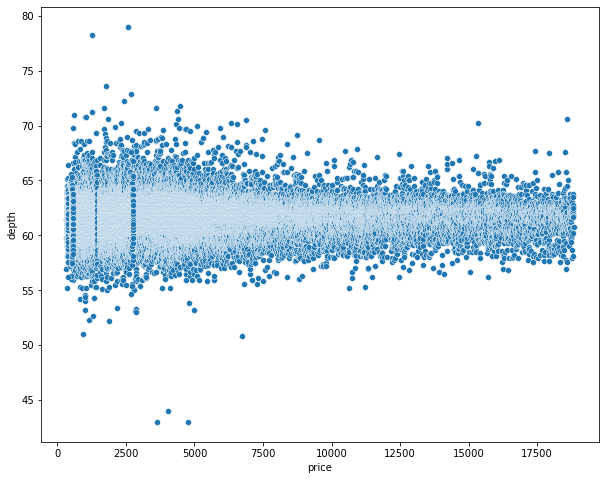

In [8]:
# ploting the price of a diamond based on its depth

plt.figure(figsize=(10,8))

sns.scatterplot(x='price',y='depth',data=df)

In [9]:
# Creating the function to remove some of the outliers of the depth column

def remove_depth_outliar(x):
    if x < 55:
        x = 61
    elif x > 70:
        x = 61
    return x

df['depth'] = df['depth'].apply(lambda x : remove_depth_outliar(x))

<AxesSubplot:xlabel='price', ylabel='depth'>

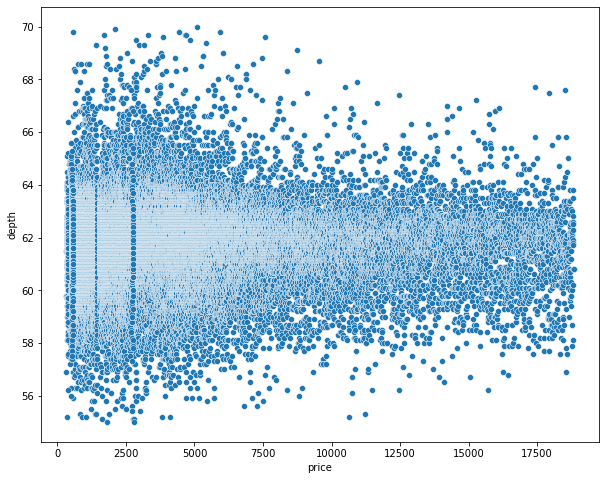

In [10]:
# again, plotting the price and depth after removing the outliers

plt.figure(figsize=(10,8))

sns.scatterplot(x='price',y='depth',data=df)

<AxesSubplot:xlabel='price', ylabel='table'>

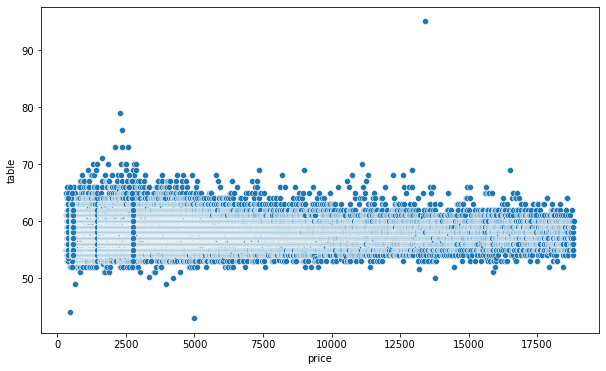

In [11]:
# ploting price and table to check for outliers

plt.figure(figsize=(10,6))

sns.scatterplot(x='price',y='table',data=df)

In [12]:
# function for removing outliers in the table column

def remove_table_outliar(x):
    if x < 57:
        x = 61
    elif x > 68:
        x = 67
    return x

df['table'] = df['table'].apply(lambda x : remove_table_outliar(x))

<AxesSubplot:xlabel='price', ylabel='table'>

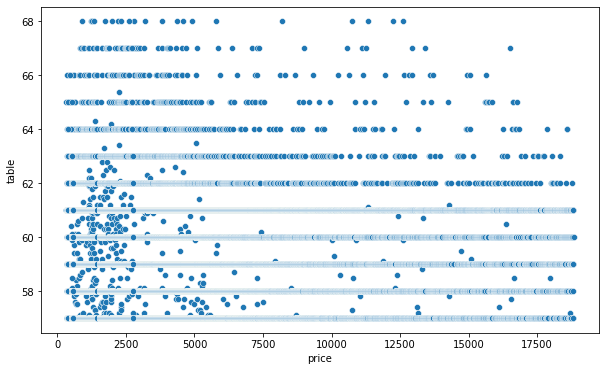

In [13]:
# again, plotting the price and table after removing the outliers

plt.figure(figsize=(10,6))

sns.scatterplot(x='price',y='table',data=df)

<AxesSubplot:xlabel='price', ylabel='carat'>

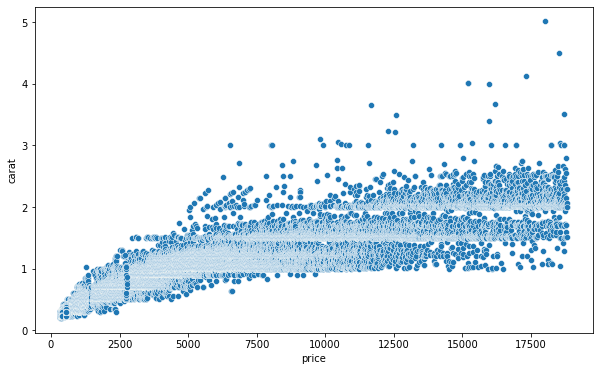

In [14]:
# ploting price and carat to check for outliers

plt.figure(figsize=(10,6))

sns.scatterplot(x='price',y='carat',data=df)

In [15]:
# function for removing outliers in the carat column

def remove_carat_outliar(x):
    if x > 2.7:
        x = 1
    return x

df['carat'] = df['carat'].apply(lambda x : remove_carat_outliar(x))

<AxesSubplot:xlabel='price', ylabel='carat'>

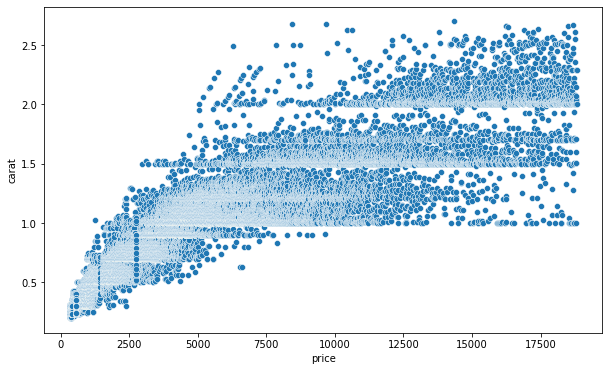

In [16]:
# again, plotting the price and carat after removing the outliers

plt.figure(figsize=(10,6))

sns.scatterplot(x='price',y='carat',data=df)

### Creating the dummies variables for the colour column

In [17]:
df_dummie = pd.get_dummies(df['color'],drop_first=True,prefix='color')

### Creating positional variables for cut and clarity column
  
  We are doing this because cut and clarity are crucial things to determine the price of a diamond
  so if cut and clarity are bad of a diamond then it drastically reduces the price of a diamond  

In [18]:
# function for positional variables

def cut_numeric(data):
    if data == 'Fair':
        return 0
    elif data == 'Ideal':
        return 1
    elif data == 'Good':
        return 2
    elif data == 'Very Good':
        return 3
    elif data == 'Premium':
        return 4
    
df['cut_num'] = df['cut'].apply(lambda x : cut_numeric(x))

In [19]:
# function for positional variables

def clarity_numeric(data):
    if data == 'SI2':
        return 0
    elif data == 'SI1':
        return 1
    elif data == 'VS1':
        return 2
    elif data == 'VS2':
        return 3
    elif data == 'VVS2':
        return 4
    elif data == 'VVS1':
        return 5
    elif data == 'I1':
        return 6
    elif data == 'IF':
        return 7
    
df['clarity_num'] = df['clarity'].apply(lambda x : clarity_numeric(x))

In [20]:
# joining the dummies data frame and original data frame

df = df.join(df_dummie)

In [21]:
# Checking the columns of the data frame for newly created columns

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,clarity_num,color_E,color_F,color_G,color_H,color_I,color_J
1,0.23,Ideal,E,SI2,61.5,61.0,326,3.95,3.98,2.43,1,0,1,0,0,0,0,0
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,1,1,0,0,0,0,0
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,2,1,0,0,0,0,0
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,3,0,0,0,0,1,0
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0,0,0,0,0,0,1


# Creating Machine Learning models

## Importing the important libraries for Machine Learning

In [22]:
# train_test_split for dividing the data set into the training set and testing

from sklearn.model_selection import train_test_split

# GridSearchCV for selecting the beast parameters for models

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from time import time

# importing joblib for saving the into .pkl file 

import joblib

# Importing the Multi-layer Perceptron Regressor model

from sklearn.neural_network import MLPRegressor

### Creating the features and label data frame for training the and testing the model

In [23]:
feature = df[['carat', 'depth', 'table', 'x', 'y','z', 'cut_num', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I','color_J', 'clarity_num']]

label = df[['price']]

In [24]:
# splitting the features and label into training evaluating and testing data sets

x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.4)

# Here splitting the test set into validation set and testing set for our models

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [25]:
# Fuction to print out the result of the GridSearchCV model

def print_result(results):
    
    # printing the best parameters for the model
    
    print('Best parameters : {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        
        # printing the mean and atd of every posibal combination of parameters
        
        print('{} (+/- {}) for {}'.format(round(mean, 3), round(std*2, 3), params))

# Creating the linear regression model

In [26]:
# Creating the instance of LinearRegression model

lr = LinearRegression()

# fitting the model

lr_model = lr.fit(x_train, y_train)

y_pred = lr_model.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Mean Squared error : 1755913.46
model accuracy : 88.94


### Storing the Models using the joblib package for testing the model against each other

In [27]:
# Storing the model as lr_model

joblib.dump(lr_model,'lr_model.joblib')

['lr_model.joblib']

# Creating the RandomForestRegressor model

In [28]:
# Creating the instance of RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)

# fitting the RandomForestRegressor model 

rfr_model = rfr.fit(feature, label.values.ravel())

y_pred = rfr_model.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Mean Squared error : 40247.35
model accuracy : 99.75


In [29]:
# Storing the RandomForestRegressor model as rfr_model

joblib.dump(rfr_model, 'rfr_model.joblib')

['rfr_model.joblib']

# Creating the DecisionTreeRegressor model

In [30]:
# Creating the instance of DecisionTreeRegressor as dtr

dtr = DecisionTreeRegressor()
# list of parameters for the GridSearchCV

parameters = {
    'max_depth' : [2, 5, 7, 10, 30, 50,  90, None]
}

# creating the instance of GridSearchCV

cv = GridSearchCV(dtr, parameters, cv=3)

# fitting the GridSearchCV model 

cv.fit(feature, label.values.ravel())

#printing the result

print_result(cv)

y_pred = cv.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score

print("<--------------------------------------------------------------------------------------------------------------->\n")

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Best parameters : {'max_depth': 30}

-4.958 (+/- 8.937) for {'max_depth': 2}
-0.92 (+/- 1.884) for {'max_depth': 5}
-0.54 (+/- 1.44) for {'max_depth': 7}
-0.65 (+/- 1.623) for {'max_depth': 10}
-0.515 (+/- 1.482) for {'max_depth': 30}
-0.611 (+/- 1.595) for {'max_depth': 50}
-0.591 (+/- 1.568) for {'max_depth': 90}
-0.614 (+/- 1.594) for {'max_depth': None}
<--------------------------------------------------------------------------------------------------------------->

Mean Squared error : 347.48
model accuracy : 100.0


In [31]:
# Storing the DecissionTreeRegressor model as dtr_model

joblib.dump(cv.best_estimator_, 'dtr_model.joblib')

['dtr_model.joblib']

# Creating the Ridge linear model

In [32]:
# Creating the instance of Ridge linear algorithm as r

r = Ridge()

# fitting the Ridge model

ridge_model = r.fit(x_train, y_train)

# predicating the values of x_val

y_pred = ridge_model.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Mean Squared error : 1756175.4
model accuracy : 88.94


In [33]:
# Storing the Ridge linear model as ridge_model

joblib.dump(ridge_model, 'ridge_model.joblib')

['ridge_model.joblib']

# Creating the KNeighborsRegressor model

In [34]:
# Creating the instance of KNeighborsRegressor

knn = KNeighborsRegressor()

# list of parameters for the GridSearchCV

parameters = {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
}

# creating the instance of GridSearchCV

cv = GridSearchCV(knn, parameters, cv=3)

# fitting the GridSearchCV model 

cv.fit(feature, label.values.ravel())

#printing the result

print_result(cv)

y_pred = cv.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score
print("<--------------------------------------------------------------------------------------------------------------->\n")

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Best parameters : {'n_neighbors': 8}

-0.383 (+/- 1.271) for {'n_neighbors': 2}
-0.323 (+/- 1.191) for {'n_neighbors': 3}
-0.316 (+/- 1.197) for {'n_neighbors': 4}
-0.313 (+/- 1.201) for {'n_neighbors': 5}
-0.307 (+/- 1.193) for {'n_neighbors': 6}
-0.307 (+/- 1.196) for {'n_neighbors': 7}
-0.306 (+/- 1.193) for {'n_neighbors': 8}
-0.311 (+/- 1.203) for {'n_neighbors': 9}
-0.312 (+/- 1.207) for {'n_neighbors': 10}
-0.315 (+/- 1.217) for {'n_neighbors': 11}
<--------------------------------------------------------------------------------------------------------------->

Mean Squared error : 580516.52
model accuracy : 96.35


In [35]:
# Storing the KNeighboursRegressor model as knn_model

joblib.dump(cv.best_estimator_, 'knn_model.joblib')

['knn_model.joblib']

# Creating the SVR model 

In [36]:
# Creating the instance of SVR algoritham

svr = SVR(kernel='linear')

# fitting the model

svr_model = svr.fit(x_train, y_train.values.ravel())
# predication the model on x_val

y_pred = svr_model.predict(x_val)

# Evaluting the performance of the model on the validation set by MSE and r2-score

print('Mean Squared error : '+format(round(mean_squared_error(y_val,y_pred), 2)))

print("model accuracy : " + format(round(r2_score(y_val,y_pred)*100, 2)))

Mean Squared error : 3545506.83
model accuracy : 77.68


In [37]:
# Storing the SVR model as svr_model

joblib.dump(svr_model, 'svr_model.joblib')

['svr_model.joblib']

# Creating the Multi-layer Perceptron model

In [38]:
# Creating the instance of MLPRegessor

mlp_reg = MLPRegressor(max_iter=60000, hidden_layer_sizes = (50, 2))

# fitting the MLP model

mlp_model = mlp_reg.fit(x_train, y_train.values.ravel())

# Predicating the values of x_val based on the tarined model
 
y_pred = mlp_model.predict(x_val)

# Evaluating performance of tarined model

# Mean Squared Error is a good evelauter for a linear model

print('Mean Squared error : '+format(round(mean_squared_error(y_test,y_pred), 2)))

# r2 score of model

print("model accuracy : " + format(round(r2_score(y_test,y_pred)*100, 2)))

Mean Squared error : 31074183.68
model accuracy : -94.84


In [39]:
# Storing the SVR model as svr_model

joblib.dump(mlp_model, 'mlp_model.joblib')

['mlp_model.joblib']

### All the models to predict price are created 

   Now we have to evaluate these models on the test set and choose the best model.

#### These are the conditions to choose the best model:-

* **How accurate is our model?**
* **How long will the model take to train?**
* **How long will the model take to predict?**
* **How will they handle messy data?**
* **How model handle the data of different sizes, such as short and fat, long and skinny?**
* **How interpretable is our model is?**


### Mean Square Error and R-squared(r2 Score) of these models:-

##### Linear Regression model
    
    Mean Squared Error: 1949747.04
    R-Squared: 87.66 

##### Random Forest Regressor model
    
    Mean Squared Error: 41488.73
    R-Squared: 99.74 
    
##### Decision Tree Regressor model
    
    Mean Squared Error: 196.23
    R-Squared: 100.0
    
##### Ridge linear model
    
    Mean Squared error: 1949343.77
    R-Squared: 87.66
    
##### K Neighbors Regressor model 
    
    Mean Squared error: 583065.18
    R-Squared: 96.31
    
##### SVR(Support Vector Regressor)  model
    
    Mean Squared error: 3486758.6
    R-Squared: 77.93 
    
##### Multi-layer Perceptron Regressor model
    
    Mean Squared error: 31197957.41
    R-Squared: -94.25     
    
After observing these models we can say that the top three are-

* Decision Tree Regressor model
* Random Forest Regressor model
* K Neighbors Regressor model

These three models have the best R-Squared score for our validation test set but we can not be certain that these are the best model. Now the time has come to test all models on the testing data set.

# Read in Models

In [40]:
# read all the models that we have stored

models = {}

# loop to store all model in models dict

for mdl in ['lr', 'rfr', 'dtr', 'ridge', 'knn', 'svr', 'mlp']:
    models[mdl] = joblib.load('{}_model.joblib'.format(mdl))

In [41]:
# function to evaluate the models

def evaluate_model(name, model, x_test, y_test):
    
    start = time()
    
    pred = model.predict(x_test)
    
    end = time()
    
    mse = round(mean_squared_error(y_test, pred), 3)
    
    r2_scores = round(r2_score(y_test, pred), 3) * 100
    
    print('{} - MSE: {} / R2: {} / latency: {}ms'.format(name.upper(), mse, r2_scores, round((end - start), 3)))

In [42]:
for name, mdl in models.items():
    evaluate_model(name, mdl, x_test, y_test)

LR - MSE: 1850305.927 / R2: 88.4 / latency: 0.003ms
RFR - MSE: 42981.911 / R2: 99.7 / latency: 0.701ms
DTR - MSE: 181.729 / R2: 100.0 / latency: 0.006ms
RIDGE - MSE: 1850716.567 / R2: 88.4 / latency: 0.002ms
KNN - MSE: 577133.077 / R2: 96.39999999999999 / latency: 1.127ms
SVR - MSE: 3525102.69 / R2: 77.9 / latency: 13.957ms
MLP - MSE: 960409.034 / R2: 94.0 / latency: 0.007ms


# Selecting the best model

Based on test performance we can choose the best model.
So I think that best model is:- **Decision Tree Regressor model**
Why i choose this model? because this model has very low latency, low traning time, high R-Squared score, transparecy and it can also work with big data sets.

## So our Winner is Decision Tree Regressor 

# Thank you